# 1. problem statement

In [1]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')


In [2]:
# 1. problem statement

# to predict the price of pune house by using various features.

In [3]:
df = pd.read_csv('Pune_House_Data.csv')
df

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,Pashan
13316,Super built-up Area,Ready To Move,4 BHK,NaN,3600,5.0,NaN,400.00,Paud Road
13317,Built-up Area,Ready To Move,2 BHK,Mahla T,1141,2.0,1.0,60.00,Pirangut
13318,Super built-up Area,18-Jun,4 BHK,SollyCl,4689,4.0,1.0,488.00,Prabhat Road


In [4]:
# 3. Exploratory Data Analysis(EDA)

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   availability   13320 non-null  object 
 2   size           13304 non-null  object 
 3   society        7818 non-null   object 
 4   total_sqft     13320 non-null  object 
 5   bath           13247 non-null  float64
 6   balcony        12711 non-null  float64
 7   price          13320 non-null  float64
 8   site_location  13319 non-null  object 
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
### 3.1 area_type

df['area_type']

0        Super built-up  Area
1                  Plot  Area
2              Built-up  Area
3        Super built-up  Area
4        Super built-up  Area
                 ...         
13315          Built-up  Area
13316    Super built-up  Area
13317          Built-up  Area
13318    Super built-up  Area
13319    Super built-up  Area
Name: area_type, Length: 13320, dtype: object

In [6]:


df['area_type'].isna().sum()

0

In [7]:
#  one hot enconding

df = pd.get_dummies(df,columns=['area_type'])
df

,availability,size,society,total_sqft,bath,balcony,price,site_location,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road,0,0,0,1
1,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk,0,0,1,0
2,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar,1,0,0,0
3,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh,0,0,0,1
4,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13315,Ready To Move,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,Pashan,1,0,0,0
13316,Ready To Move,4 BHK,NaN,3600,5.0,NaN,400.00,Paud Road,0,0,0,1
13317,Ready To Move,2 BHK,Mahla T,1141,2.0,1.0,60.00,Pirangut,1,0,0,0
13318,18-Jun,4 BHK,SollyCl,4689,4.0,1.0,488.00,Prabhat Road,0,0,0,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   availability                    13320 non-null  object 
 1   size                            13304 non-null  object 
 2   society                         7818 non-null   object 
 3   total_sqft                      13320 non-null  object 
 4   bath                            13247 non-null  float64
 5   balcony                         12711 non-null  float64
 6   price                           13320 non-null  float64
 7   site_location                   13319 non-null  object 
 8   area_type_Built-up  Area        13320 non-null  uint8  
 9   area_type_Carpet  Area          13320 non-null  uint8  
 10  area_type_Plot  Area            13320 non-null  uint8  
 11  area_type_Super built-up  Area  13320 non-null  uint8  
dtypes: float64(3), object(5), uint8(

In [9]:
df = df.drop(['availability','society'],axis=1)
df

,size,total_sqft,bath,balcony,price,site_location,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,2 BHK,1056,2.0,1.0,39.07,Alandi Road,0,0,0,1
1,4 Bedroom,2600,5.0,3.0,120.00,Ambegaon Budruk,0,0,1,0
2,3 BHK,1440,2.0,3.0,62.00,Anandnagar,1,0,0,0
3,3 BHK,1521,3.0,1.0,95.00,Aundh,0,0,0,1
4,2 BHK,1200,2.0,1.0,51.00,Aundh Road,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
13315,5 Bedroom,3453,4.0,0.0,231.00,Pashan,1,0,0,0
13316,4 BHK,3600,5.0,NaN,400.00,Paud Road,0,0,0,1
13317,2 BHK,1141,2.0,1.0,60.00,Pirangut,1,0,0,0
13318,4 BHK,4689,4.0,1.0,488.00,Prabhat Road,0,0,0,1


In [10]:
### 3.3 size

df['size']

df['size'].isna().sum()



df['size'].value_counts()




label_encoder = preprocessing.LabelEncoder()
df['size']=label_encoder.fit_transform(df['size'])

df['size'].value_counts()

df['size'].fillna(df['size'].mode()[0],inplace=True)

df['size'].isna().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   size                            13320 non-null  int32  
 1   total_sqft                      13320 non-null  object 
 2   bath                            13247 non-null  float64
 3   balcony                         12711 non-null  float64
 4   price                           13320 non-null  float64
 5   site_location                   13319 non-null  object 
 6   area_type_Built-up  Area        13320 non-null  uint8  
 7   area_type_Carpet  Area          13320 non-null  uint8  
 8   area_type_Plot  Area            13320 non-null  uint8  
 9   area_type_Super built-up  Area  13320 non-null  uint8  
dtypes: float64(3), int32(1), object(2), uint8(4)
memory usage: 624.5+ KB


In [12]:
#### 3.5 total_sqft 

df['total_sqft']

df['total_sqft'].isna().sum()

df['total_sqft'].value_counts()

df['total_sqft'].unique() 


array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [13]:
# Since the total_sqft contains range values such as 1133-1384, lets filter out these values
def isFloat(x):
    try:
        float(x)
    except:
        return False
    return True

# Displaying all the rows that are not integers
df[~df['total_sqft'].apply(isFloat)]

,size,total_sqft,bath,balcony,price,site_location,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
30,18,2100 - 2850,4.0,0.0,186.000,Gultekdi,0,0,0,1
56,19,3010 - 3410,NaN,NaN,192.000,Model colony,1,0,0,0
81,19,2957 - 3450,NaN,NaN,224.500,Shukrawar Peth,1,0,0,0
122,18,3067 - 8156,4.0,0.0,477.000,Ganeshkhind,0,0,0,1
137,13,1042 - 1105,2.0,0.0,54.005,Khadaki,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
12990,16,1804 - 2273,3.0,0.0,122.000,Gokhale Nagar,0,0,0,1
13059,13,1200 - 1470,2.0,0.0,72.760,Anandnagar,0,0,0,1
13240,0,1020 - 1130,NaN,NaN,52.570,Vadgaon Budruk,0,0,0,1
13265,13,1133 - 1384,2.0,0.0,59.135,Dapodi,0,0,0,1


In [14]:
# Converting the range values to integer values and removing other types of error
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
    
df['new_total_sqft'] = df.total_sqft.apply(convert_sqft_to_num)
df = df.drop('total_sqft', axis='columns')
df


,size,bath,balcony,price,site_location,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,new_total_sqft
0,13,2.0,1.0,39.07,Alandi Road,0,0,0,1,1056.0
1,19,5.0,3.0,120.00,Ambegaon Budruk,0,0,1,0,2600.0
2,16,2.0,3.0,62.00,Anandnagar,1,0,0,0,1440.0
3,16,3.0,1.0,95.00,Aundh,0,0,0,1,1521.0
4,13,2.0,1.0,51.00,Aundh Road,0,0,0,1,1200.0
...,...,...,...,...,...,...,...,...,...,...
13315,22,4.0,0.0,231.00,Pashan,1,0,0,0,3453.0
13316,18,5.0,NaN,400.00,Paud Road,0,0,0,1,3600.0
13317,13,2.0,1.0,60.00,Pirangut,1,0,0,0,1141.0
13318,18,4.0,1.0,488.00,Prabhat Road,0,0,0,1,4689.0


In [15]:

df['new_total_sqft'].fillna(df['new_total_sqft'].median(),inplace=True)

df['new_total_sqft'].isnull().sum()

0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   size                            13320 non-null  int32  
 1   bath                            13247 non-null  float64
 2   balcony                         12711 non-null  float64
 3   price                           13320 non-null  float64
 4   site_location                   13319 non-null  object 
 5   area_type_Built-up  Area        13320 non-null  uint8  
 6   area_type_Carpet  Area          13320 non-null  uint8  
 7   area_type_Plot  Area            13320 non-null  uint8  
 8   area_type_Super built-up  Area  13320 non-null  uint8  
 9   new_total_sqft                  13320 non-null  float64
dtypes: float64(4), int32(1), object(1), uint8(4)
memory usage: 624.5+ KB


In [17]:
### 3.6 bath and balcony

df['bath'].fillna(df['bath'].median(),inplace=True)
df['balcony'].fillna(df['balcony'].median(),inplace=True)

df['bath'].isna().sum()
df['balcony'].isna().sum()

0

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   size                            13320 non-null  int32  
 1   bath                            13320 non-null  float64
 2   balcony                         13320 non-null  float64
 3   price                           13320 non-null  float64
 4   site_location                   13319 non-null  object 
 5   area_type_Built-up  Area        13320 non-null  uint8  
 6   area_type_Carpet  Area          13320 non-null  uint8  
 7   area_type_Plot  Area            13320 non-null  uint8  
 8   area_type_Super built-up  Area  13320 non-null  uint8  
 9   new_total_sqft                  13320 non-null  float64
dtypes: float64(4), int32(1), object(1), uint8(4)
memory usage: 624.5+ KB


In [19]:
### 3.7 site_location 

df=pd.get_dummies(df,columns=['site_location'])
df

,size,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,new_total_sqft,site_location_Alandi Road,...,site_location_Vadgaon Budruk,site_location_Viman Nagar,site_location_Vishrant Wadi,site_location_Wadgaon Sheri,site_location_Wagholi,site_location_Wakadewadi,site_location_Wanowrie,site_location_Warje,site_location_Yerawada,site_location_other
0,13,2.0,1.0,39.07,0,0,0,1,1056.0,1,...,0,0,0,0,0,0,0,0,0,0
1,19,5.0,3.0,120.00,0,0,1,0,2600.0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,2.0,3.0,62.00,1,0,0,0,1440.0,0,...,0,0,0,0,0,0,0,0,0,0
3,16,3.0,1.0,95.00,0,0,0,1,1521.0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,2.0,1.0,51.00,0,0,0,1,1200.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,22,4.0,0.0,231.00,1,0,0,0,3453.0,0,...,0,0,0,0,0,0,0,0,0,0
13316,18,5.0,2.0,400.00,0,0,0,1,3600.0,0,...,0,0,0,0,0,0,0,0,0,0
13317,13,2.0,1.0,60.00,1,0,0,0,1141.0,0,...,0,0,0,0,0,0,0,0,0,0
13318,18,4.0,1.0,488.00,0,0,0,1,4689.0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Columns: 106 entries, size to site_location_other
dtypes: float64(4), int32(1), uint8(101)
memory usage: 1.7 MB


In [21]:
# feature Engineering

<AxesSubplot:>

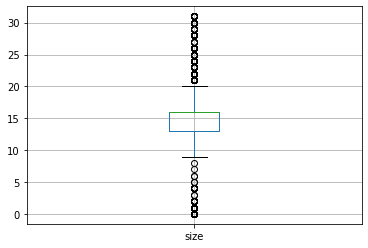

In [22]:
df[['size']].boxplot()

q1--> 13.0
q2--> 16.0
q3--> 16.0
upper_tail--> 20.5
lower_tail--> 8.5


<AxesSubplot:>

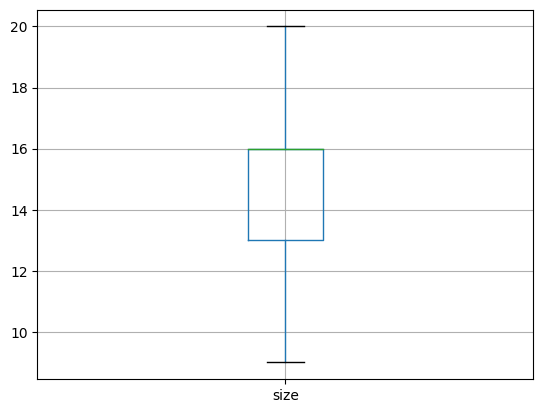

In [23]:
q1=df['size'].quantile(0.25)
q2=df['size'].quantile(0.50)
q3=df['size'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

df['size'].mean()

df['size'].median()

size_df=df[['size']].loc[(df['size'] < upper_tail) & 
                                   (df['size'] > lower_tail)].median()[0]
size_df  

df.loc[(df['size'] > upper_tail) |
                (df['size'] < lower_tail), 'size'] = size_df


df[['size']].boxplot()

<AxesSubplot:>

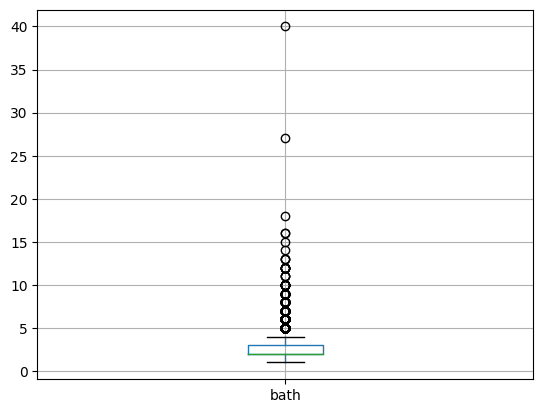

In [24]:
df[['bath']].boxplot()

q1--> 2.0
q2--> 2.0
q3--> 3.0
upper_tail--> 4.5
lower_tail--> 0.5


<AxesSubplot:>

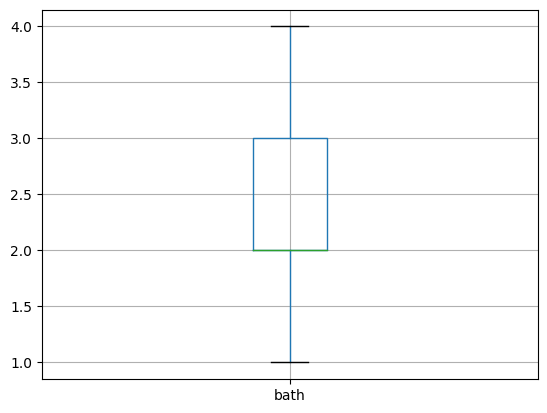

In [25]:
q1=df['bath'].quantile(0.25)
q2=df['bath'].quantile(0.50)
q3=df['bath'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

df['bath'].mean()

df['bath'].median()

bath_df=df[['bath']].loc[(df['bath'] < upper_tail) & 
                                   (df['bath'] > lower_tail)].median()[0]
bath_df  

df.loc[(df['bath'] > upper_tail) |
                (df['bath'] < lower_tail), 'bath'] = bath_df

df[['bath']].boxplot()

<AxesSubplot:>

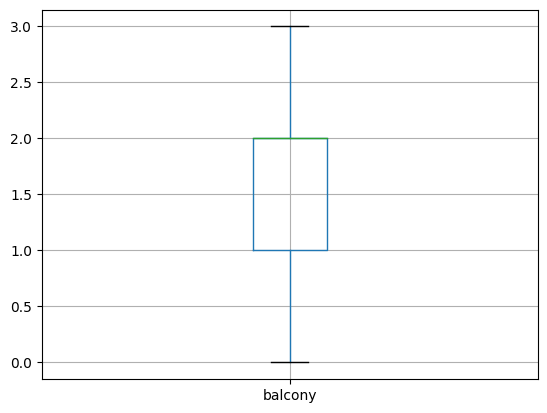

In [26]:
df[['balcony']].boxplot()

<AxesSubplot:>

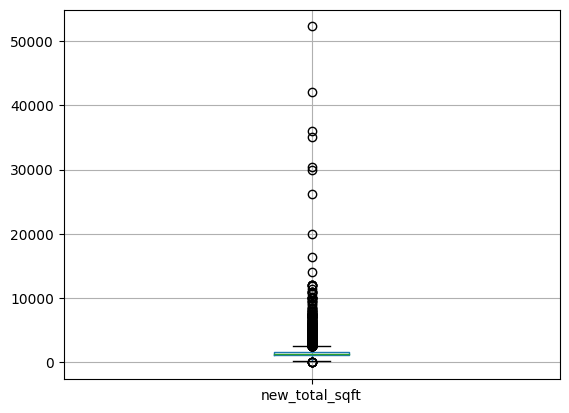

In [27]:
df[['new_total_sqft']].boxplot()

q1--> 1100.0
q2--> 1276.0
q3--> 1678.0
upper_tail--> 2545.0
lower_tail--> 233.0


<AxesSubplot:>

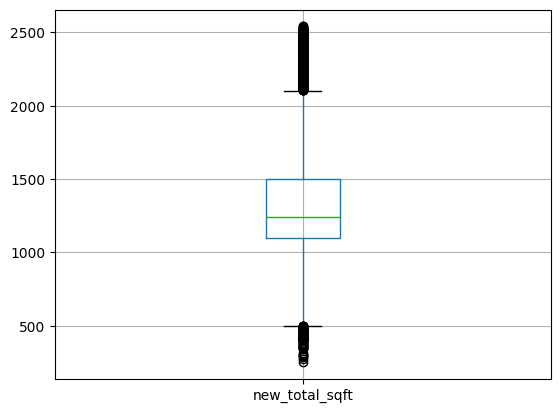

In [28]:
q1=df['new_total_sqft'].quantile(0.25)
q2=df['new_total_sqft'].quantile(0.50)
q3=df['new_total_sqft'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

new_total_df=df[['new_total_sqft']].loc[(df['new_total_sqft'] < upper_tail) & 
                                   (df['new_total_sqft'] > lower_tail)].median()[0]


df.loc[(df['new_total_sqft'] > upper_tail) |
                (df['new_total_sqft'] < lower_tail), 'new_total_sqft'] = new_total_df

df[['new_total_sqft']].boxplot()

<AxesSubplot:>

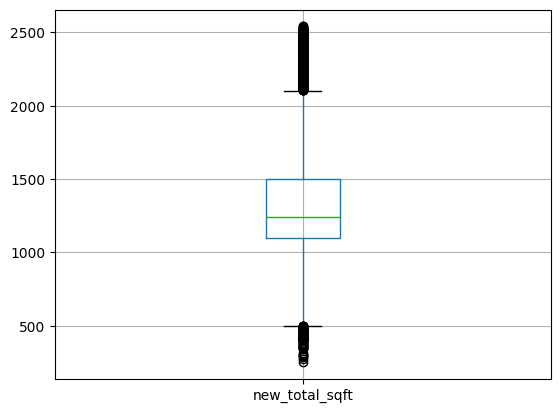

In [29]:
df.loc[(df['new_total_sqft'] > upper_tail) |
                (df['new_total_sqft'] < lower_tail), 'new_total_sqft'] = 0

df[['new_total_sqft']].boxplot()

<AxesSubplot:>

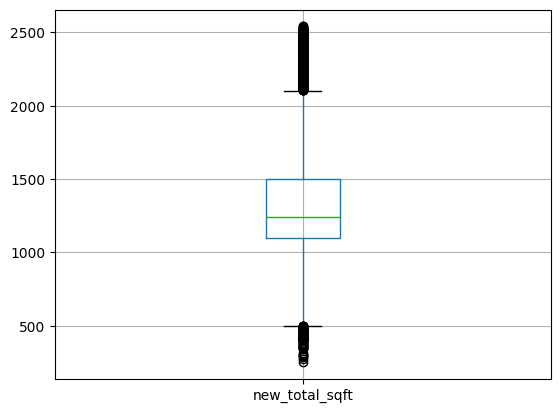

In [30]:
df.loc[(df['new_total_sqft'] > upper_tail) |
                (df['new_total_sqft'] < lower_tail), 'new_total_sqft'] = upper_tail

df[['new_total_sqft']].boxplot()

In [31]:
from scipy.stats import zscore

In [32]:
z_score = zscore(df['new_total_sqft'])


<AxesSubplot:xlabel='new_total_sqft'>

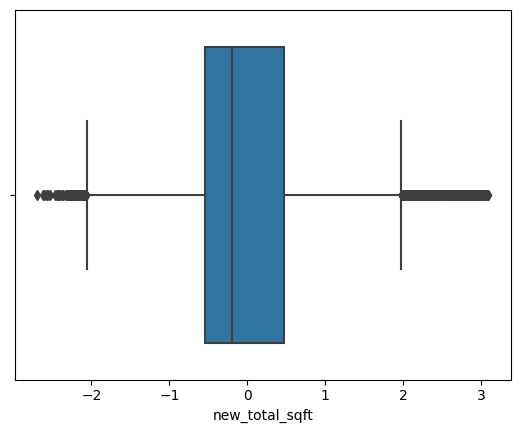

In [33]:
sns.boxplot(x=z_score)

In [34]:
Xmax = max(df['new_total_sqft'])
Xmax

2540.0

In [35]:
Xmin = min(df['new_total_sqft'])
Xmin

250.0

In [36]:
x_norm_list = []
for i in df['new_total_sqft']:
    Xnorm = (i - Xmin)/(Xmax - Xmin)
    x_norm_list.append(Xnorm)
    
x_norm_list

[0.3519650655021834,
 0.43231441048034935,
 0.519650655021834,
 0.5550218340611354,
 0.4148471615720524,
 0.4017467248908297,
 0.43231441048034935,
 0.43231441048034935,
 0.462882096069869,
 0.33624454148471616,
 0.6768558951965066,
 0.43231441048034935,
 0.32751091703056767,
 0.37117903930131,
 0.8733624454148472,
 0.4039301310043668,
 0.40611353711790393,
 0.5633187772925764,
 0.43231441048034935,
 0.37117903930131,
 0.15283842794759825,
 0.6572052401746725,
 0.43231441048034935,
 0.6624454148471616,
 0.11353711790393013,
 0.4366812227074236,
 0.17903930131004367,
 0.5938864628820961,
 0.39344978165938865,
 0.3384279475982533,
 0.9716157205240175,
 0.36026200873362446,
 0.6593886462882096,
 0.6301310043668122,
 0.7314410480349345,
 0.1965065502183406,
 0.35807860262008734,
 0.6436681222707423,
 0.45414847161572053,
 0.38995633187772927,
 0.45676855895196505,
 0.43842794759825326,
 0.15283842794759825,
 0.17903930131004367,
 0.47193886462882095,
 0.15283842794759825,
 0.31441048034934

<AxesSubplot:>

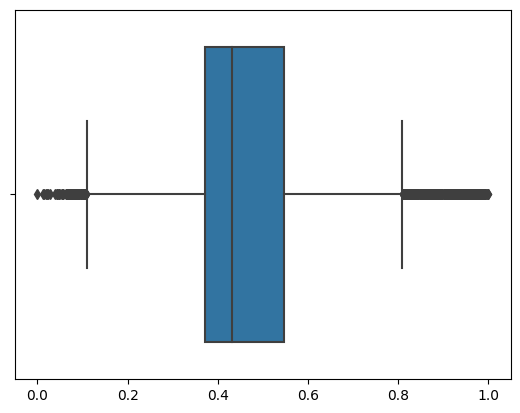

In [37]:
sns.boxplot(x=x_norm_list)

<AxesSubplot:xlabel='new_total_sqft'>

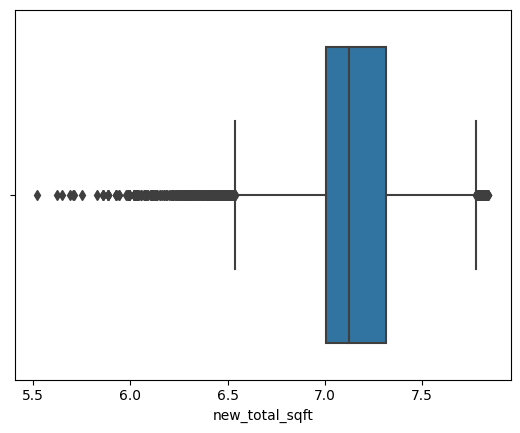

In [38]:
sns.boxplot(x=np.log(df['new_total_sqft']))

<AxesSubplot:>

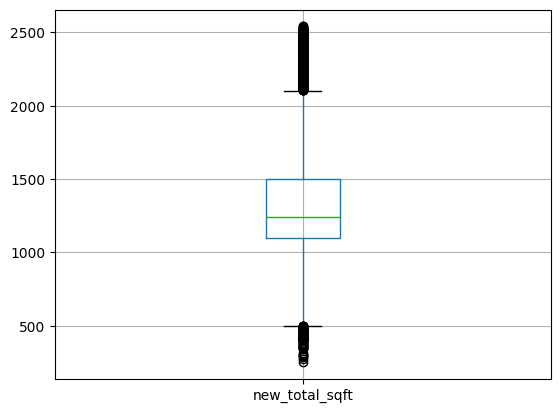

In [39]:
df.loc[(df['new_total_sqft'] > upper_tail) |
                (df['new_total_sqft'] < lower_tail), 'new_total_sqft'] = lower_tail

df[['new_total_sqft']].boxplot()

# Model Training

In [40]:
x = df.drop('price',axis=1)

y = df['price']

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

### to create the instance of model

In [42]:
pune_model=LinearRegression()

In [43]:
pune_model.fit(x_train,y_train)

LinearRegression()

# Metric Evalution

In [44]:
y_pred_test = pune_model.predict(x_test)
y_pred_test

array([ 49.72441014,  44.8656264 , 239.80265442, ...,  31.75890067,
        54.204751  ,  32.350675  ])

In [45]:
# testing data
y_pred_test = pune_model.predict(x_test)
mse = mean_squared_error(y_test,y_pred_test)
print('mse-->',mse)
rmse = np.sqrt(mse)
print('rmse-->',rmse)
mae = mean_absolute_error(y_test,y_pred_test)
print('mae-->',mae)
r2 = r2_score(y_test,y_pred_test)
print('r2 score-->',r2)

mse--> 23729.70626251047
rmse--> 154.0444944245346
mae--> 61.49469114067409
r2 score--> 0.16092568084043213


In [46]:
# training data
y_pred_train = pune_model.predict(x_train)
mse = mean_squared_error(y_train,y_pred_train)
print('mse-->',mse)
rmse = np.sqrt(mse)
print('rmse-->',rmse)
mae = mean_absolute_error(y_train,y_pred_train)
print('mae-->',mae)
r2 = r2_score(y_train,y_pred_train)
print('r2 score-->',r2)

mse--> 16427.052077994726
rmse--> 128.16806184847584
mae--> 58.598873187325154
r2 score--> 0.20508846288337979


# Testing on Single Row

In [47]:
column_names = x.columns
len(column_names)

105

In [48]:
x.head(1).T

,0
size,13.0
bath,2.0
balcony,1.0
area_type_Built-up Area,0.0
area_type_Carpet Area,0.0
...,...
site_location_Wakadewadi,0.0
site_location_Wanowrie,0.0
site_location_Warje,0.0
site_location_Yerawada,0.0


In [49]:
# Testing on Single Row

column_names = x.columns
len(column_names)

x.head(1).T

,0
size,13.0
bath,2.0
balcony,1.0
area_type_Built-up Area,0.0
area_type_Carpet Area,0.0
...,...
site_location_Wakadewadi,0.0
site_location_Wanowrie,0.0
site_location_Warje,0.0
site_location_Yerawada,0.0


In [50]:
column_names

Index(['size', 'bath', 'balcony', 'area_type_Built-up  Area',
       'area_type_Carpet  Area', 'area_type_Plot  Area',
       'area_type_Super built-up  Area', 'new_total_sqft',
       'site_location_Alandi Road', 'site_location_Ambegaon Budruk',
       ...
       'site_location_Vadgaon Budruk', 'site_location_Viman Nagar',
       'site_location_Vishrant Wadi', 'site_location_Wadgaon Sheri',
       'site_location_Wagholi', 'site_location_Wakadewadi',
       'site_location_Wanowrie', 'site_location_Warje',
       'site_location_Yerawada', 'site_location_other'],
      dtype='object', length=105)

In [51]:
# user inpur
size = 20.0
bath = 3.0
balcony = 2.0
new_total_sqft = 2000.0

area_type="Carpet  Area"
site_location="Yerawada"
area_type_col = "area_type_" + area_type
print(area_type_col)
site_location_col="site_location_" + site_location
print(site_location_col)

area_type_Carpet  Area
site_location_Yerawada


In [52]:
column_names = np.array(column_names)
column_names

array(['size', 'bath', 'balcony', 'area_type_Built-up  Area',
       'area_type_Carpet  Area', 'area_type_Plot  Area',
       'area_type_Super built-up  Area', 'new_total_sqft',
       'site_location_Alandi Road', 'site_location_Ambegaon Budruk',
       'site_location_Anandnagar', 'site_location_Aundh',
       'site_location_Aundh Road', 'site_location_Balaji Nagar',
       'site_location_Baner', 'site_location_Baner road',
       'site_location_Bhandarkar Road', 'site_location_Bhavani Peth',
       'site_location_Bibvewadi', 'site_location_Bopodi',
       'site_location_Budhwar Peth', 'site_location_Bund Garden Road',
       'site_location_Camp', 'site_location_Chandan Nagar',
       'site_location_Dapodi', 'site_location_Deccan Gymkhana',
       'site_location_Dehu Road', 'site_location_Dhankawadi',
       'site_location_Dhayari Phata', 'site_location_Dhole Patil Road',
       'site_location_Erandwane', 'site_location_Fatima Nagar',
       'site_location_Fergusson College Road',
    

In [53]:
area_type_index = np.where(column_names == area_type_col)[0][0]
print(area_type_index)

4


In [54]:
site_location_index = np.where(column_names == site_location_col)[0][0]
print(site_location_index)

103


In [55]:
array = np.zeros(len(column_names), dtype = int)
array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [56]:
array[0]=size
array[1]=bath
array[2]=balcony
array[7]=new_total_sqft

array[area_type_index] = 1
array[site_location_index] = 1

array

array([  20,    3,    2,    0,    1,    0,    0, 2000,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    1,    0])

In [57]:
predicted_price = pune_model.predict([array])[0]  # 2 D
print("Predicted Price of your Home :",predicted_price, "lakh")

Predicted Price of your Home : 243.80113015181223 lakh


In [58]:
pune_model_enconding_col = {'column_names':list(column_names)}
pune_model_enconding_col

{'column_names': ['size',
  'bath',
  'balcony',
  'area_type_Built-up  Area',
  'area_type_Carpet  Area',
  'area_type_Plot  Area',
  'area_type_Super built-up  Area',
  'new_total_sqft',
  'site_location_Alandi Road',
  'site_location_Ambegaon Budruk',
  'site_location_Anandnagar',
  'site_location_Aundh',
  'site_location_Aundh Road',
  'site_location_Balaji Nagar',
  'site_location_Baner',
  'site_location_Baner road',
  'site_location_Bhandarkar Road',
  'site_location_Bhavani Peth',
  'site_location_Bibvewadi',
  'site_location_Bopodi',
  'site_location_Budhwar Peth',
  'site_location_Bund Garden Road',
  'site_location_Camp',
  'site_location_Chandan Nagar',
  'site_location_Dapodi',
  'site_location_Deccan Gymkhana',
  'site_location_Dehu Road',
  'site_location_Dhankawadi',
  'site_location_Dhayari Phata',
  'site_location_Dhole Patil Road',
  'site_location_Erandwane',
  'site_location_Fatima Nagar',
  'site_location_Fergusson College Road',
  'site_location_Ganesh Peth',
  '

In [59]:
# Save Model in Pickle File
import pickle

with open("pude_model.pkl", "wb") as f:
    pickle.dump(pune_model, f)

In [60]:
# Store all this values in JSON


import json

with open("Pune_model_enconding_col.json", "w") as f:
    json.dump(pune_model_enconding_col, f)

In [65]:
pune_model_enconding_col['column_names'].index(area_type_col)

4